## Tal Sharoni, Justin Lipper

### Phys-321 Final Project

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from astropy import units as u
from astropy.visualization import astropy_mpl_style
from scipy.integrate import trapz
import scipy.stats as stats
from scipy.optimize import curve_fit
import corner
import emcee
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# to compare to our Solar System
radius = [0.383, 0.949, 1, 0.532, 11.21, 9.45, 4.01, 3.88]
stallar_rad = 1
a = [0.387, 0.723, 1, 1.52, 5.20, 9.57, 19.17, 30.18]

In [3]:
def parse_data(filename):
    radius = []
    stallar_rad = []
    orbital_period = []
    orbit_sma = []
    with open(filename, 'r') as f:
        csvreader = csv.reader(f)
        for row in csvreader:
            if row[0].startswith('#'):
                continue
            if row[0] == 'pl_name':
                continue
            else:
                if (row[21] == '') or (row[26] == '') or (row[19] == '') or (row[20] == ''):
                    continue
                radius.append(float(row[21]))
                stallar_rad.append(float(row[26]))
                orbital_period.append(float(row[19]))
                orbit_sma.append(float(row[20]))
    return radius, stallar_rad, orbital_period, orbit_sma            

In [4]:
radius, stallar_rad, orbital_period, orbit_sma = parse_data('./PSCompPars_2024.03.30_12.22.56.csv')

First, we would like to create a likelihood model for the data, we will do so by fitting the distribution of all the parameters. We can start by plotting histograms of each parameter, and fitting a function to it. Some x domains will be cut off since there are significant outliers with extreme data, and we would like to see the trends of the distributions but those outliers will still be considered for later in the data analysis. Some of the data was also filtered to be able to bin it appropriately. The fitted fuction will be used as likelihood functions.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


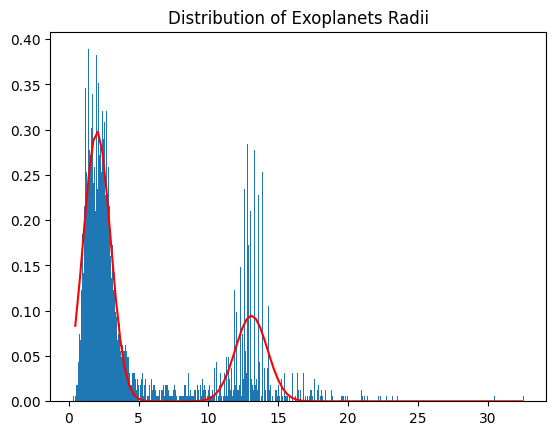

In [13]:
plt.hist(radius, bins=1000, density=True);
plt.title('Distribution of Exoplanets Radii')
def bimodal(x, mu1, sigma1, mu2, sigma2, w1):
    return (w1 * (1 / np.sqrt(2 * np.pi * sigma1**2)) * np.exp(-(x - mu1)**2 / (2 * sigma1**2))
            + (1 - w1) * (1 / np.sqrt(2 * np.pi * sigma2**2)) * np.exp(-(x - mu2)**2 / (2 * sigma2**2)))

hist, bins = np.histogram(radius, bins=100, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

initial_guess = [2, 2, 8, 12, 0.5]
popt, pcov = curve_fit(bimodal, bin_centers, hist, p0=initial_guess)
plt.plot(bin_centers, bimodal(bin_centers, *popt), 'r-', label='Fit')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Text(0.5, 1.0, 'Distribution of Exoplanets Staller Radii, Cut Domain')

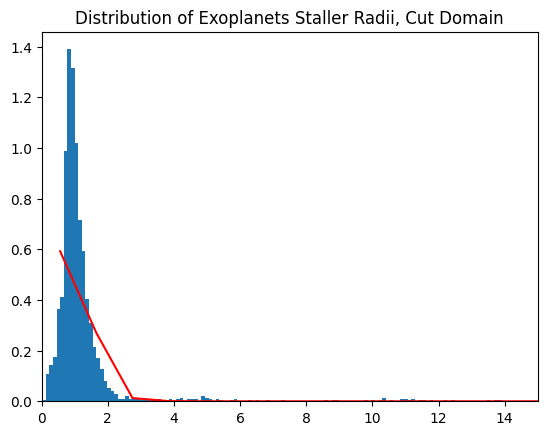

In [16]:
plt.hist(stallar_rad, bins=1000, density=True);
plt.xlim(0, 15)

def lognormal(x, m, sigma):
    return (1 / (x * np.sqrt(2 * np.pi * sigma ** 2))) * np.exp(- (np.log(x) - np.log(m)) ** 2 / (2 * sigma ** 2))

hist, bins = np.histogram(stallar_rad, bins=100, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

initial_guess = [2, 1]
popt, pcov = curve_fit(lognormal, bin_centers, hist, p0=initial_guess)
plt.plot(bin_centers, lognormal(bin_centers, *popt), 'r-', label='Fit')

plt.title('Distribution of Exoplanets Staller Radii, Cut Domain')

Text(0.5, 1.0, 'Distribution of Exoplanets Orbital Period, After Filtering')

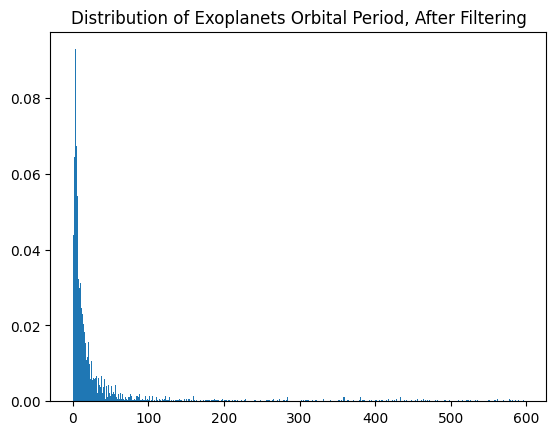

In [7]:
filtered_orbital_period = [value for value in orbital_period if value < 600]
plt.hist(filtered_orbital_period, bins=1000, density=True);
plt.title('Distribution of Exoplanets Orbital Period, After Filtering')

Text(0.5, 1.0, 'Distribution of Exoplanets Semi Major Axis, After Filtering')

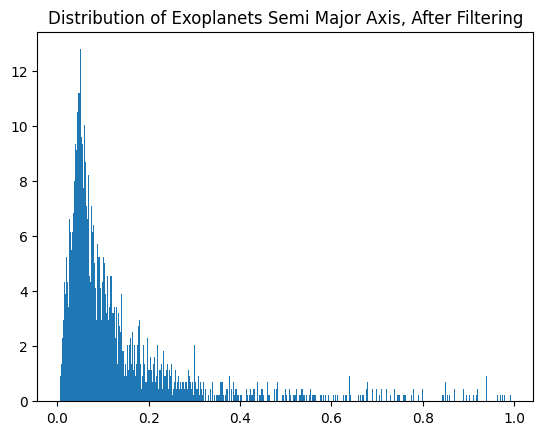

In [8]:
filtered_sma = [value for value in orbit_sma if value < 1]
plt.hist(filtered_sma, bins=1000, density=True);
plt.title('Distribution of Exoplanets Semi Major Axis, After Filtering')